In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import pandas_profiling as pp
from tqdm import tqdm
import os
import json

# Load Data

In [59]:
X = np.load('generated_data/X_final.npy')
y = np.load('generated_data/y_final.npy')

In [62]:
f= ["jc", "cn", "aa", "cos", 
    "s_out", "s_in", "t_in", "t_out", "pr_s", "pr_t", "pa",
    "katz_s", "katz_t", "hubs_s", "hubs_t", "auto_s",
    "auto_t", "sweight_out", "tweight_in", "weight_f1",
    "weight_f2", "power_low", "clust_coef_s", 
    "clust_coef_t", "short_path"]

df_X_train = pd.DataFrame(data=X_train, columns=f)
df_X_train.head()

,jc,cn,aa,cos,s_out,s_in,t_in,t_out,pr_s,pr_t,...,auto_s,auto_t,sweight_out,tweight_in,weight_f1,weight_f2,power_low,clust_coef_s,clust_coef_t,short_path
0,0.005618,1.0,0.192569,0.000142,100.0,21.0,52.0,6.0,0.000020,0.000111,...,1.524964e-04,0.000010,0.099504,0.137361,0.236864,0.013668,0.223208,1.447621,2.422988,2.0
1,0.000000,0.0,0.000000,0.000000,0.0,6.0,4.0,2.0,0.000026,0.000017,...,6.080619e-07,0.000074,1.000000,0.447214,1.447214,0.447214,0.002352,-0.000806,5.052662,33226.0
2,0.005979,4.0,0.605220,0.000166,611.0,24.0,24.0,14.0,0.000021,0.000023,...,1.484541e-04,0.000022,0.040423,0.200000,0.240423,0.008085,0.625451,4.102398,1.929883,2.0
3,0.000000,0.0,0.000000,0.000000,678.0,6.0,2.0,0.0,0.000022,0.000017,...,2.312626e-06,0.000007,0.038376,0.577350,0.615727,0.022157,0.123815,0.735087,1.922468,3.0
4,0.000000,0.0,0.000000,0.000000,39.0,9.0,13.0,0.0,0.000018,0.000031,...,9.911454e-05,0.000005,0.158114,0.267261,0.425375,0.042258,0.030486,0.455941,3.054193,3.0


# Features Analysis

In [64]:
# pp.ProfileReport(df_X_train)

In [49]:
from sklearn import preprocessing
X = X_train
y = y_train

#Split data
idx_0 = np.where(y==0)[0]
idx_1 = np.where(y==1)[0]

train_i0, test_i0, _, _ = train_test_split(idx_0, idx_0, test_size=0.1)
train_i1, test_i1, _, _ = train_test_split(idx_1, idx_1, test_size=0.1)
train_i = np.hstack((train_i0, train_i1))
test_i = np.hstack((test_i0, test_i1))

for i in range(7):
    np.random.shuffle(train_i)
    np.random.shuffle(test_i)

X_train, y_train = X[train_i], y[train_i]
X_test, y_test = X[test_i], y[test_i]

#Normalize data
X_scaled = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

def roc_plot(name, mdl, X_test, y_test, color,  figure=None):
    features, target = X_test, y_test

    # Get predicted probabilities
    target_probabilities = mdl.predict_proba(features)[:,1]

    # Create true and false positive rates
    false_positive_rate, true_positive_rate, threshold = roc_curve(target, target_probabilities)

    if figure is None:
        plt.figure(figsize=(10,10))

    y_test_pred = mdl.predict(features)
    f1_test = f1_score(target, y_test_pred) 

    # Plot ROC curve
    plt.plot(false_positive_rate, true_positive_rate, label=name+"(f1:%.3f)"%f1_test, c=color)

In [32]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(5)):
    clf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

5.0990195135927845

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


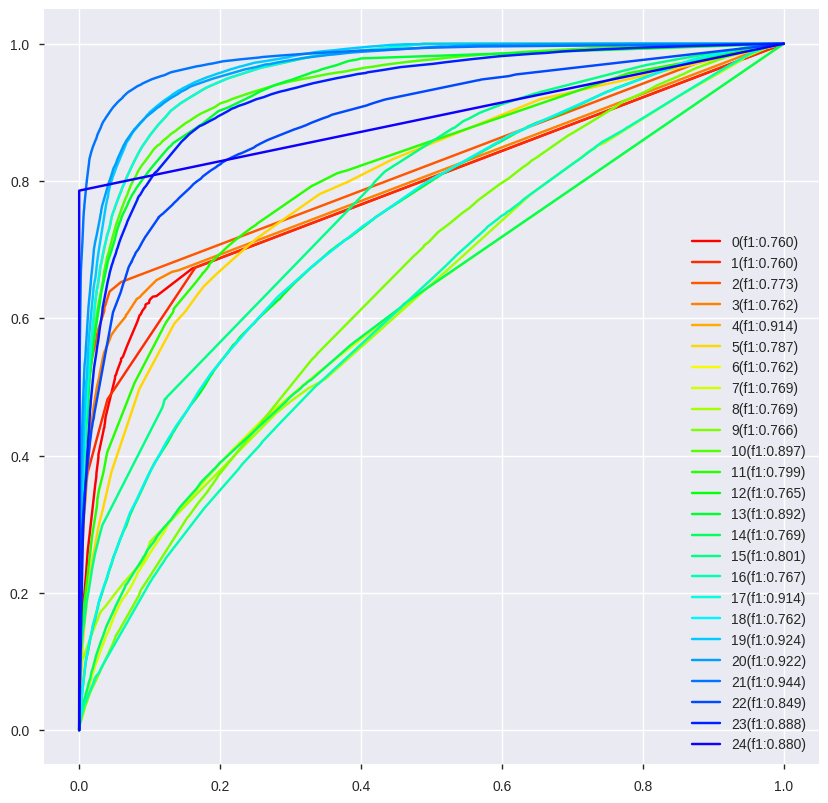

In [54]:
figr = plt.figure(figsize=(10,10))
from sklearn import linear_model
cmap = plt.cm.get_cmap('hsv', 26+10)
for i in range(25):
    print(i)
    model = RandomForestClassifier(max_depth=5, n_estimators=10, n_jobs=-1)
    model.fit(X_train[:,i].reshape(X_train.shape[0],1), y_train)
    roc_plot(str(i), model, X_test[:,i].reshape(X_test.shape[0],1), y_test, cmap(i) , figr)
plt.legend(loc='best')
plt.show()

## Corelated variable

In [8]:
from feature_selector import FeatureSelector

# Features are in train and labels are in train_labels
fs = FeatureSelector(data = df_X_train, labels=y_train)

9 features with a correlation magnitude greater than 0.98.



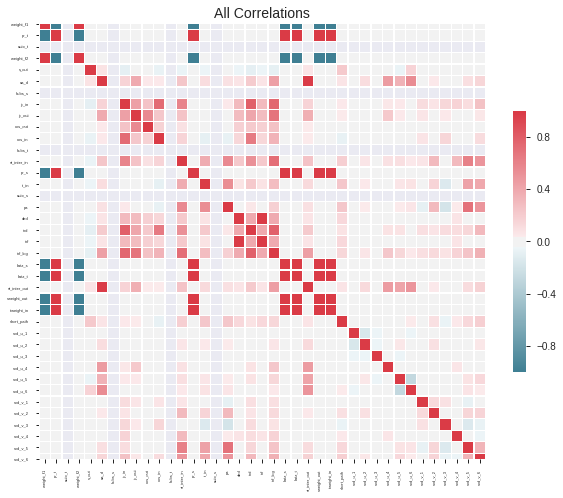

In [10]:
fs.identify_collinear(correlation_threshold = 0.98)
fs.plot_collinear(plot_all = True)

In [13]:
# list of collinear features to remove
collinear_features = fs.ops['collinear']

# dataframe of collinear features
fs.record_collinear.head()

,drop_feature,corr_feature,corr_value
0,hubs_s,s_out,0.997176
1,inf,ded,1.000000
2,katz_s,pr_s,1.000000
3,katz_t,pr_t,1.000000
4,st_inter_out,aa_d,0.987825


## Zero Importance Features

In [9]:
# Pass in the appropriate parameters
fs.identify_zero_importance(task = 'classification', 
                            eval_metric = 'auc', 
                            n_iterations = 10, 
                            early_stopping = True)

# list of zero importance features
zero_importance_features = fs.ops['zero_importance']

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[197]	valid_0's auc: 0.999999	valid_0's binary_logloss: 0.00119563
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[175]	valid_0's auc: 0.999997	valid_0's binary_logloss: 0.000914653
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.999966	valid_0's binary_logloss: 0.177939
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.612825
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.999999	valid_0's binary_logloss: 0.0265041
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[239]	valid_0's auc: 1	valid_0's binary_logloss: 0.000790211
Tra

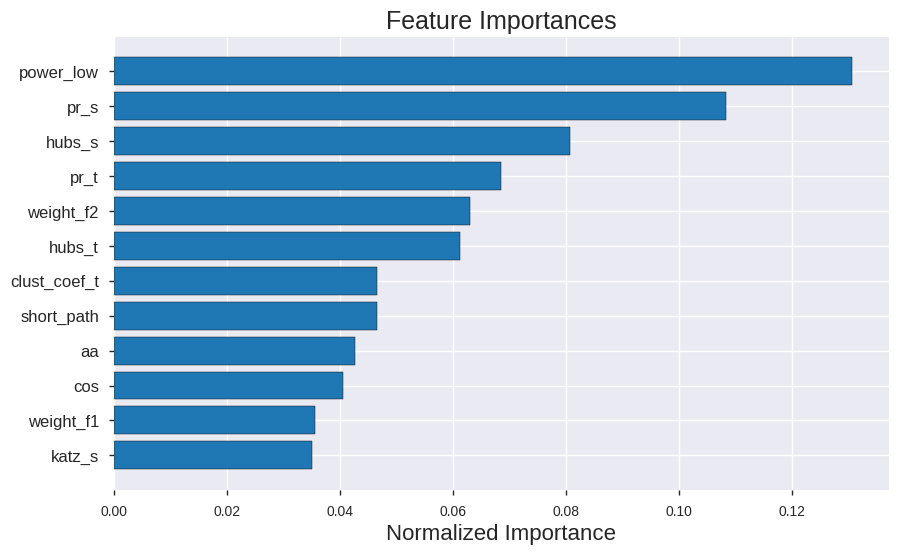

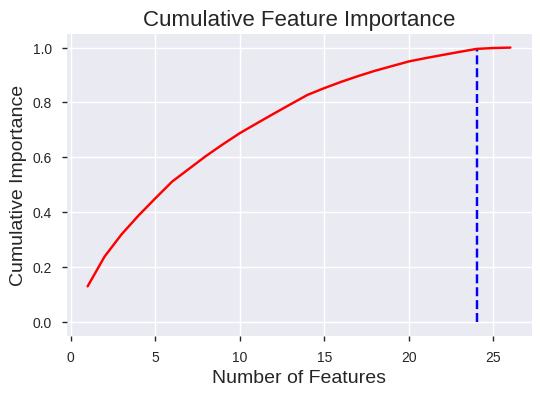

24 features required for 0.99 of cumulative importance


In [10]:
# plot the feature importances
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [11]:
fs.identify_low_importance(cumulative_importance = 0.99)
fs.feature_importances.head(10)

23 features required for cumulative importance of 0.99 after one hot encoding.
3 features do not contribute to cumulative importance of 0.99.



,feature,importance,normalized_importance,cumulative_importance
0,power_low,522.4,0.130522,0.130522
1,pr_s,433.1,0.108210,0.238732
2,hubs_s,322.7,0.080627,0.319358
3,pr_t,274.2,0.068509,0.387867
4,weight_f2,252.2,0.063012,0.450879
5,hubs_t,245.2,0.061263,0.512143
6,clust_coef_t,186.4,0.046572,0.558715
7,short_path,186.2,0.046522,0.605237
8,aa,170.6,0.042624,0.647861
9,cos,162.3,0.040551,0.688412


## Single Unique Value Features

In [25]:
fs.identify_single_unique()

0 features with a single unique value.



## Removing Features

In [ ]:
# train_removed = fs.remove(methods = 'all')